In [1]:
# download csv logfile

from paramiko import SSHClient,AutoAddPolicy
from scp import SCPClient

HOST = "192.168.1.24"
# HOST = "192.168.179.2"
PORT = "22"
USER = "robot"
PSWD = "maker"

ssh = SSHClient()
ssh.set_missing_host_key_policy(AutoAddPolicy())
ssh.connect(HOST, port=PORT, username=USER, password=PSWD)

scp = SCPClient(ssh.get_transport())

In [14]:
import pandas as pd

FILE_ID = "20190919013153" # ここに `Start time is <ID>` の<ID>を入れる
FILE_NAME = "log_%s_guide.csv" % FILE_ID

scp.get("/home/robot/src/log/%s" % FILE_NAME)

In [15]:
# =======================================================
# 表の出力
df = pd.read_csv("./%s" % FILE_NAME, encoding="UTF-8")
time_diff= df['時刻(sec)'].diff(1).fillna(0)
df.insert(2, '時刻差分(sec)', time_diff)
df

,id,時刻(sec),時刻差分(sec),処理時間(sec),速度目標,方向目標,ラインセンサー生値,ライン追跡ターゲット,ライン-ターゲット偏差,ライントレースP値,ライントレースI値,ライントレースD値,モーター角度生値左(deg),モーター角度生値右(deg)
0,0,0.008115,0.000000,0.008035,20,-4.095,570,538.25,-15.75,-4.095,-157.5,-0.0,0,0
1,1,0.017554,0.009439,0.006981,20,-8.255,570,538.25,-31.75,-8.255,-632.5,-0.0,0,0
2,2,0.026453,0.008899,0.006723,20,-8.255,570,538.25,-31.75,-8.255,-1267.5,0.0,0,0
3,3,0.035728,0.009275,0.006858,20,-8.255,569,538.25,-31.75,-8.255,-1902.5,0.0,0,0
4,4,0.044801,0.009073,0.006912,20,-7.995,569,538.25,-30.75,-7.995,-2527.5,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,256,2.352783,0.007597,0.005873,20,-29.315,651,538.25,-112.75,-29.315,-116027.5,0.0,0,0
257,257,2.361288,0.008505,0.006517,20,-29.315,651,538.25,-112.75,-29.315,-118282.5,0.0,0,0
258,258,2.369581,0.008293,0.006317,20,-29.315,651,538.25,-112.75,-29.315,-120537.5,0.0,0,0
259,259,2.377592,0.008011,0.005986,20,-29.315,651,538.25,-112.75,-29.315,-122792.5,0.0,0,0


In [16]:
%matplotlib inline
import numpy as np

# グラフを表示する関数
def show_plot(df, columns, unit, figsize=(16,10), start=0, end=np.inf):
    x_column = "時刻(sec)"
    
    df_plot = df[(df[x_column] >= start) & (df[x_column] <= end)]
    df_max = df_plot.loc[:, columns].max(axis="index").max()
    df_min = df_plot.loc[:, columns].min(axis="index").min()
    time_max = df_plot[x_column].iloc[-1]
    
    yticks_posi = np.arange(0, df_max+unit, unit)
    yticks_nega = np.arange(0, df_min-unit, -unit)
    yticks = np.concatenate([yticks_posi, yticks_nega])
    
    sec = 10 #0.1
    xticks = np.arange(start, time_max, sec)

    df_plot.plot(y=columns,  x=x_column, yticks=yticks, xticks=xticks, figsize=figsize, grid=True)

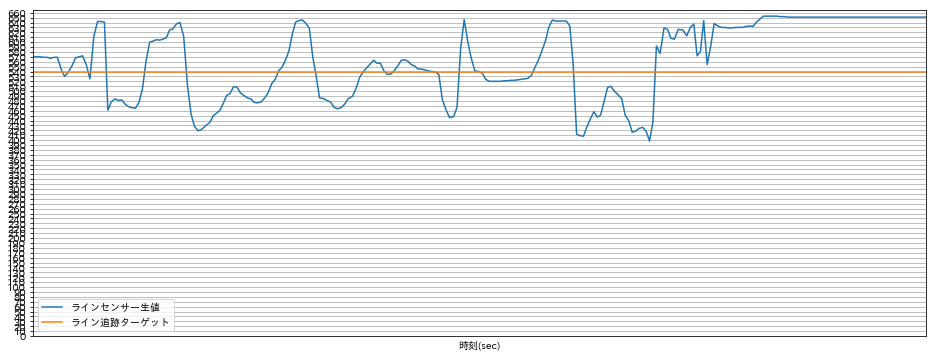

In [17]:
columns_deg = [
    'ラインセンサー生値',
    'ライン追跡ターゲット',
]
show_plot(df, columns_deg, 10, figsize=(16,6))

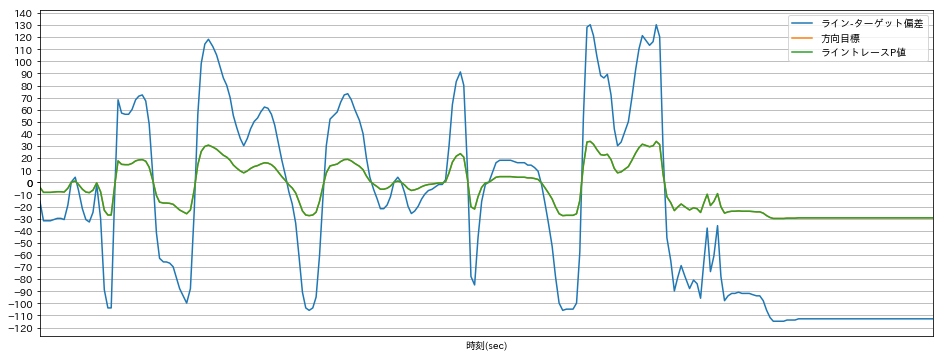

In [18]:
columns_deg = [
    'ライン-ターゲット偏差',
    '方向目標',
    'ライントレースP値',
]
show_plot(df, columns_deg, 10, figsize=(16,6))

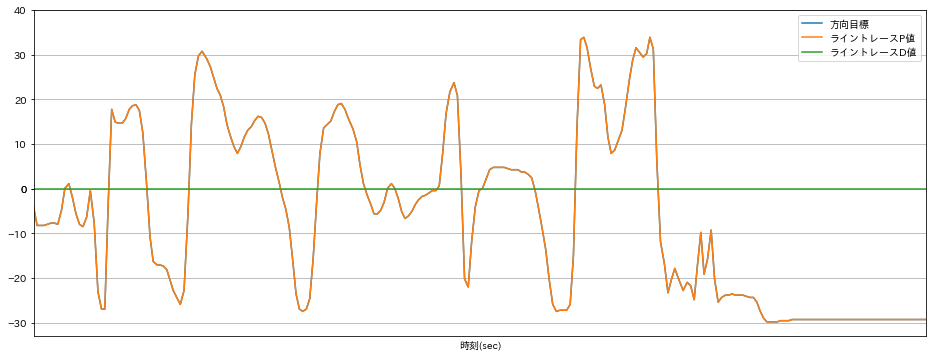

In [19]:
columns_deg = [
    '方向目標',
    'ライントレースP値',
#     'ライントレースI値',
    'ライントレースD値'
]
show_plot(df, columns_deg, 10, figsize=(16,6))